In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,ControlCorruption,GDPgrowth,GovernmentEffectiveness,ExpenditureOnEducation,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,LiteracyRate,PoliticalStability,PopulationDensity,RuleOfLaw,SchoolEnrollmentPrimary,SchoolEnrollmentSecondary,UnemploymentRate,VoiceAndAccountability
0,1980,7.254323,0.670,13.40,NaN,5.846027,NaN,NaN,0.00,0.0,65.253,NaN,NaN,238.297640,NaN,119.281517,NaN,15.69,NaN
1,1981,8.263114,0.560,5.29,NaN,5.699525,NaN,NaN,0.04,0.0,NaN,86.777924,NaN,242.368330,NaN,122.501320,1.00952,NaN,NaN
2,1982,9.325140,0.778,4.38,NaN,4.141496,NaN,NaN,0.01,0.0,NaN,NaN,NaN,246.192840,NaN,122.830040,1.01670,NaN,NaN
3,1983,10.563145,0.990,17.50,NaN,4.813991,NaN,NaN,0.05,0.0,NaN,NaN,NaN,249.696093,NaN,122.421852,1.01531,NaN,NaN
4,1984,9.632510,0.944,3.34,NaN,5.099147,NaN,NaN,0.00,0.0,NaN,NaN,NaN,253.110780,NaN,122.966499,1.01798,NaN,NaN


In [3]:
# Threshold for missing values
threshold = 0.40

# Remove columns with more than 35% missing values
df2 = df.loc[:, df.isnull().mean() <= threshold]
df2.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,NaN,242.368330,122.501320,NaN
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,NaN,246.192840,122.830040,NaN
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,NaN,249.696093,122.421852,NaN
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,NaN,253.110780,122.966499,NaN


In [4]:
# Strip whitespace from column names
df2.columns = df2.columns.str.strip()

# Fill leading and trailing NaNs with ffill and bfill
df2 = df2.ffill().bfill()

# Perform column-wise interpolation only on numeric columns
for col in df2.select_dtypes(include=[np.number]).columns:
    df2[col] = df2[col].interpolate(method='linear')

In [5]:
df2.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69


In [6]:
df2.tail()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
39,2019,3.651252,3.427305,23.92,-0.220484,0.0,50.687327,56.864,352.431695,97.277206,4.670
40,2020,3.736849,3.427305,19.06,-4.624516,0.0,36.184734,55.156,354.332363,97.478661,5.360
41,2021,3.562741,3.427305,19.06,3.512225,0.0,44.453087,55.881,358.163595,96.871758,5.306
42,2022,3.215646,3.427305,19.06,-7.823977,0.0,53.362000,56.115,358.163595,96.871758,6.178
43,2023,3.963214,3.427305,19.06,-7.823977,0.0,58.360000,56.115,358.163595,96.871758,6.643


In [7]:
df2.to_csv('output_file.csv', index=False)

<Axes: xlabel='Year', ylabel='IntentionalHomicidesRate'>

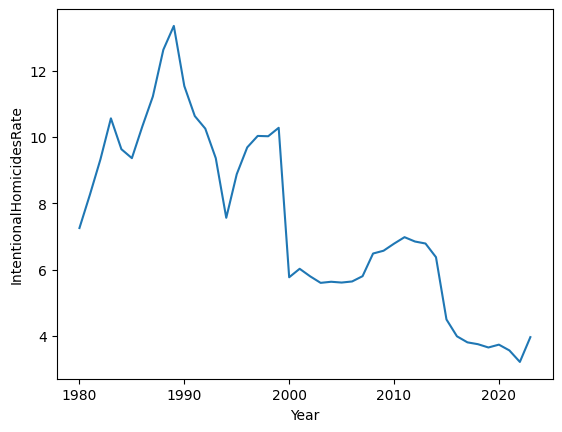

In [8]:
sns.lineplot(data=df2,x=df.Year,y=df2.IntentionalHomicidesRate)

In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()

# Standardize all numeric columns
df3= pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [10]:
df3.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,-1.693123,-0.066090,-1.398540,0.383056,0.485159,-0.280970,-0.577954,1.519607,-1.853571,1.556689,1.358328
1,-1.614373,0.306649,-1.545786,-0.811783,0.444209,0.268483,-0.577954,1.519607,-1.739350,1.908158,1.358328
2,-1.535624,0.699059,-1.253972,-0.945853,0.008711,-0.143607,-0.577954,1.519607,-1.632036,1.944041,1.358328
3,-1.456874,1.156491,-0.970189,0.987105,0.196686,0.405846,-0.577954,1.519607,-1.533737,1.899484,1.358328
4,-1.378124,0.812629,-1.031764,-1.099075,0.276392,-0.280970,-0.577954,1.519607,-1.437922,1.958937,1.358328


<Axes: >

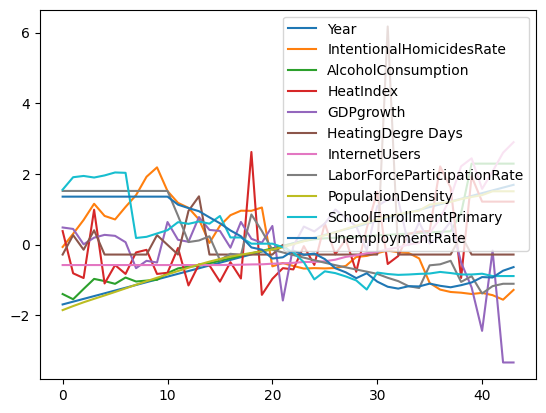

In [11]:
df3.plot()

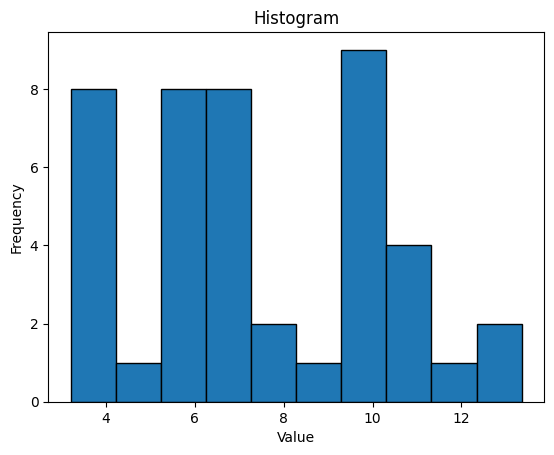

In [12]:
plt.hist(df2['IntentionalHomicidesRate'], bins=10, edgecolor='black')  # 'bins' defines the number of bars
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

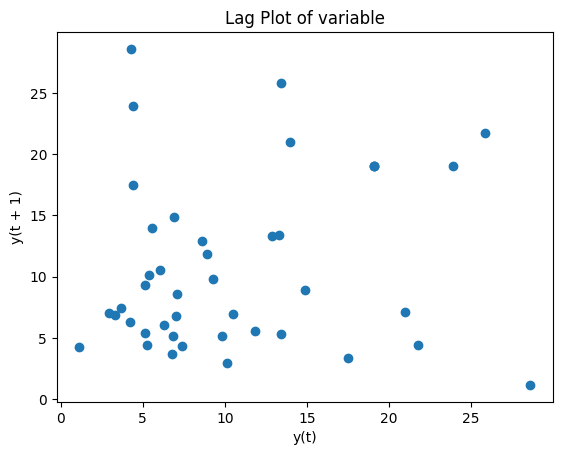

In [15]:
from pandas.plotting import lag_plot

lag_plot(df2['HeatIndex'])
plt.title('Lag Plot of variable')
plt.show()

In [12]:
df2.drop('Year', axis=1, inplace=True)

In [13]:
df2.head()

,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69
1,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69
2,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69
3,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69
4,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69


<Axes: xlabel='AlcoholConsumption', ylabel='IntentionalHomicidesRate'>

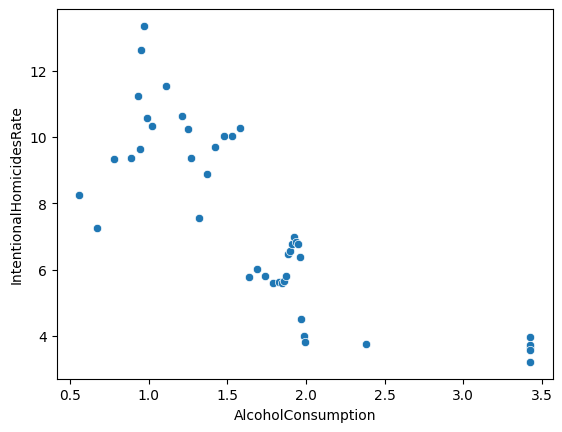

In [29]:
sns.scatterplot(data=df2,x=df2.AlcoholConsumption,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='GDPgrowth', ylabel='IntentionalHomicidesRate'>

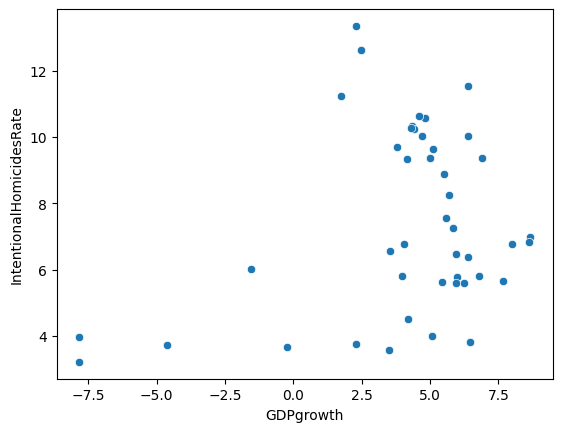

In [30]:
sns.scatterplot(data=df2,x=df2.GDPgrowth,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='HeatIndex', ylabel='IntentionalHomicidesRate'>

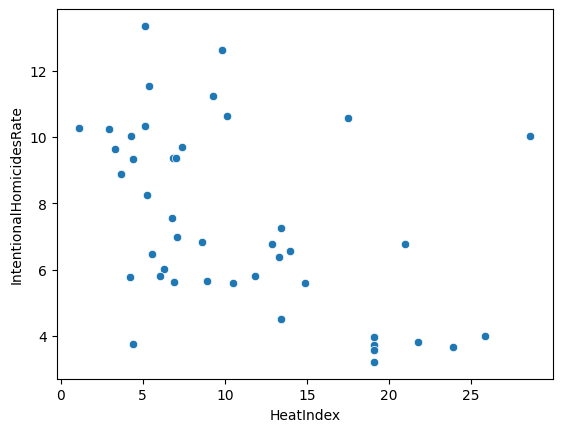

In [31]:
sns.scatterplot(data=df2,x=df2.HeatIndex,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='InternetUsers', ylabel='IntentionalHomicidesRate'>

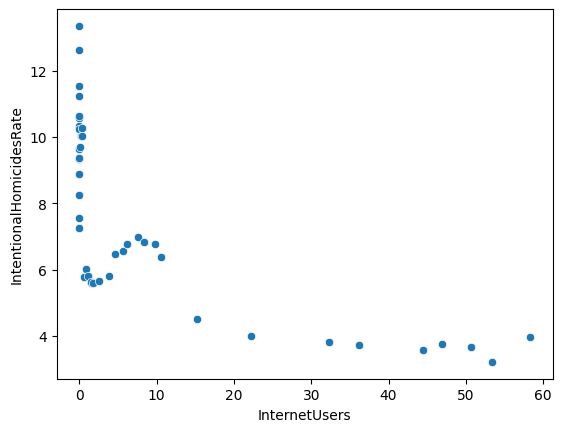

In [32]:
sns.scatterplot(data=df2,x=df2.InternetUsers,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='LaborForceParticipationRate', ylabel='IntentionalHomicidesRate'>

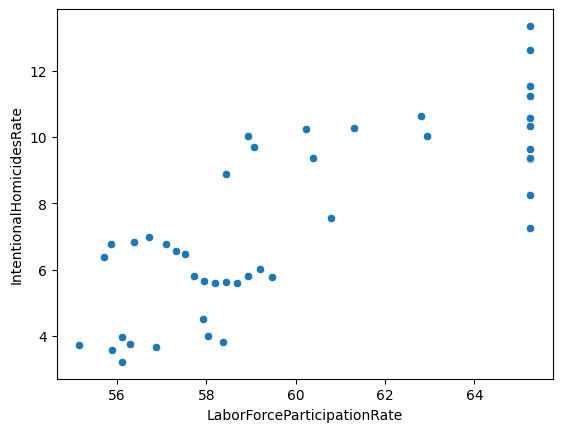

In [33]:
sns.scatterplot(data=df2,x=df2.LaborForceParticipationRate,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='PopulationDensity', ylabel='IntentionalHomicidesRate'>

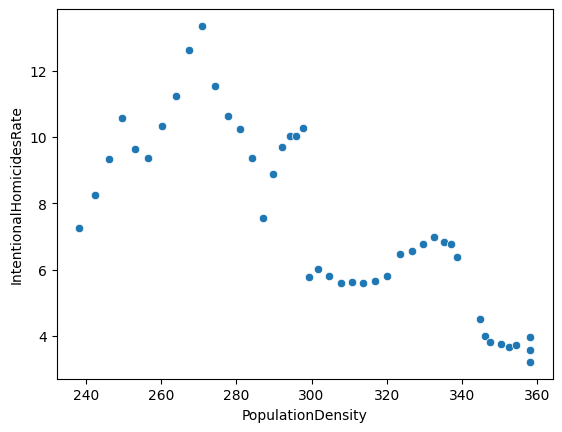

In [34]:
sns.scatterplot(data=df2,x=df2.PopulationDensity,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='SchoolEnrollmentPrimary', ylabel='IntentionalHomicidesRate'>

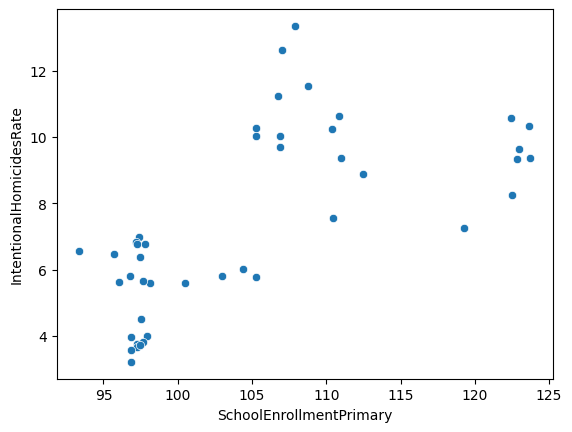

In [35]:
sns.scatterplot(data=df2,x=df2.SchoolEnrollmentPrimary,y=df2.IntentionalHomicidesRate)

<Axes: xlabel='UnemploymentRate', ylabel='IntentionalHomicidesRate'>

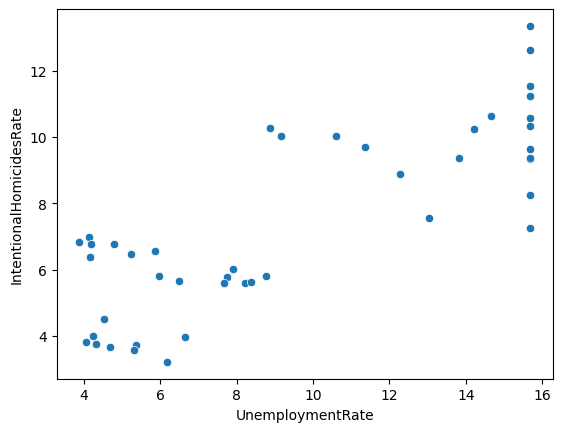

In [36]:
sns.scatterplot(data=df2,x=df2.UnemploymentRate,y=df2.IntentionalHomicidesRate)

Test For Multicorreliarity

In [38]:
correlation_matrix = df2.corr()
print(correlation_matrix)

                             IntentionalHomicidesRate  AlcoholConsumption  \
IntentionalHomicidesRate                     1.000000           -0.788930   
AlcoholConsumption                          -0.788930            1.000000   
HeatIndex                                   -0.471053            0.546377   
GDPgrowth                                    0.275541           -0.558085   
HeatingDegre Days                            0.071944           -0.044159   
InternetUsers                               -0.698639            0.868614   
LaborForceParticipationRate                  0.787652           -0.816189   
PopulationDensity                           -0.805186            0.902459   
SchoolEnrollmentPrimary                      0.652250           -0.743166   
UnemploymentRate                             0.812405           -0.771441   

                             HeatIndex  GDPgrowth  HeatingDegre Days  \
IntentionalHomicidesRate     -0.471053   0.275541           0.071944   
AlcoholC

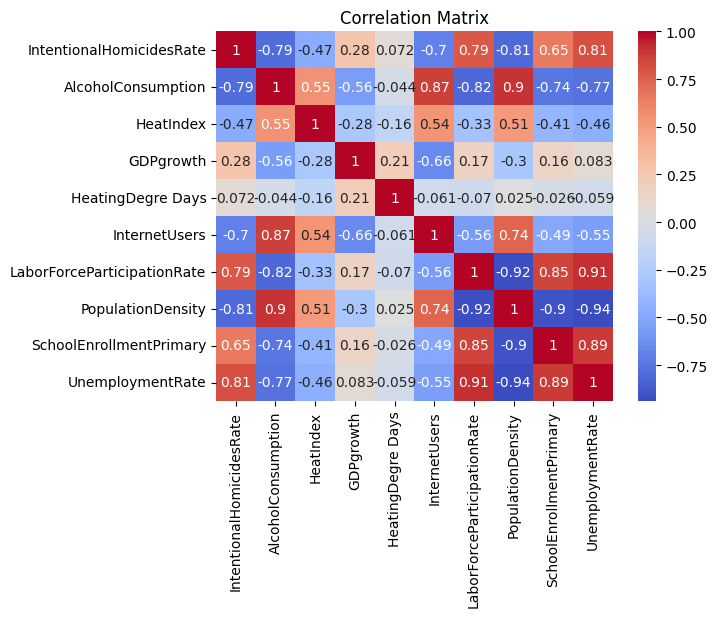

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

MLR Model Fitting

In [40]:
x = df2.drop('IntentionalHomicidesRate', axis=1)  # Predictor variables
y = df2['IntentionalHomicidesRate']

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

# Initialize the model
mlr = LinearRegression()

# Fit the model
mlr.fit(x_train, y_train)

LinearRegression()

In [43]:
# Coefficients of predictors
print("Coefficients:", mlr.coef_)
# Intercept
print("Intercept:", mlr.intercept_)

Coefficients: [-0.82718658  0.00840418 -0.00849202  2.89763939 -0.09349766  0.41625194
  0.09573561 -0.02883142  0.62534815]
Intercept: -47.258384285060686


In [44]:
y_pred = mlr.predict(x_test)
y_pred

array([ 5.48559717,  7.6568498 ,  7.3407473 ,  6.32309716,  5.59833999,
        4.1452956 ,  9.6053349 ,  9.63842914, 11.50848767])

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7862510088498335


In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.974940713685693


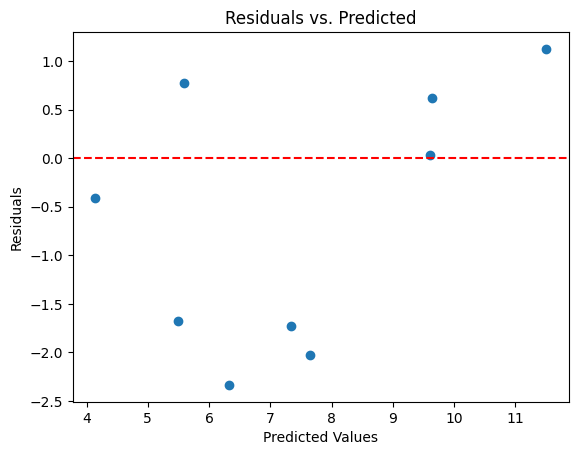

In [47]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [66]:
import statsmodels.api as sm
X = sm.add_constant(x)  # Add a constant term (intercept)
# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.820
Model:                                  OLS   Adj. R-squared:                  0.772
Method:                       Least Squares   F-statistic:                     17.16
Date:                      Sun, 22 Dec 2024   Prob (F-statistic):           3.17e-10
Time:                              12:03:02   Log-Likelihood:                -68.565
No. Observations:                        44   AIC:                             157.1
Df Residuals:                            34   BIC:                             175.0
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [67]:
import statsmodels.api as sm
import itertools
def stepwise_aic(X, y):
    """
    Perform stepwise AIC-based model selection.

    Parameters:
    X (pd.DataFrame): Predictor variables.
    y (pd.Series): Dependent variable.

    Returns:
    statsmodels model object with the best AIC score.
    """
    def fit_model(X, y):
        return sm.OLS(y, sm.add_constant(X)).fit()

    initial_features = []
    best_features = []
    best_aic = float('inf')
    step = 0

    while True:
        step += 1
        changed = False
        aic_candidates = []

        # Forward Step: Test adding variables
        for feature in X.columns:
            if feature not in initial_features:
                trial_features = initial_features + [feature]
                model = fit_model(X[trial_features], y)
                aic_candidates.append((model.aic, feature, 'add'))

        # Backward Step: Test removing variables
        for feature in initial_features:
            trial_features = [f for f in initial_features if f != feature]
            if trial_features:
                model = fit_model(X[trial_features], y)
                aic_candidates.append((model.aic, feature, 'remove'))

        # Find best candidate
        if aic_candidates:
            best_candidate = min(aic_candidates, key=lambda x: x[0])

            if best_candidate[0] < best_aic:
                best_aic = best_candidate[0]
                if best_candidate[2] == 'add':
                    initial_features.append(best_candidate[1])
                elif best_candidate[2] == 'remove':
                    initial_features.remove(best_candidate[1])
                changed = True

        if not changed:
            break

    # Fit final model
    best_model = fit_model(X[initial_features], y)
    return best_model


In [68]:
best_model = stepwise_aic(X, y)

# Summary of the best model
print(best_model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.815
Model:                                  OLS   Adj. R-squared:                  0.791
Method:                       Least Squares   F-statistic:                     33.55
Date:                      Sun, 22 Dec 2024   Prob (F-statistic):           5.91e-13
Time:                              12:04:45   Log-Likelihood:                -69.079
No. Observations:                        44   AIC:                             150.2
Df Residuals:                            38   BIC:                             160.9
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [73]:
df4 = df2[['IntentionalHomicidesRate','UnemploymentRate','InternetUsers','LaborForceParticipationRate','PopulationDensity','HeatingDegre Days']]
df4.head()

,IntentionalHomicidesRate,UnemploymentRate,InternetUsers,LaborForceParticipationRate,PopulationDensity,HeatingDegre Days
0,7.254323,15.69,0.0,65.253,238.297640,0.00
1,8.263114,15.69,0.0,65.253,242.368330,0.04
2,9.325140,15.69,0.0,65.253,246.192840,0.01
3,10.563145,15.69,0.0,65.253,249.696093,0.05
4,9.632510,15.69,0.0,65.253,253.110780,0.00


In [82]:
df4.shape

(44, 8)

In [76]:
import statsmodels.api as sm
x = df4.drop('IntentionalHomicidesRate', axis=1)  # Predictor variables
y = df4['IntentionalHomicidesRate']
X = sm.add_constant(x)  # Add a constant term (intercept)
# Fit the model
model4 = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.815
Model:                                  OLS   Adj. R-squared:                  0.791
Method:                       Least Squares   F-statistic:                     33.55
Date:                      Sun, 22 Dec 2024   Prob (F-statistic):           5.91e-13
Time:                              12:18:08   Log-Likelihood:                -69.079
No. Observations:                        44   AIC:                             150.2
Df Residuals:                            38   BIC:                             160.9
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

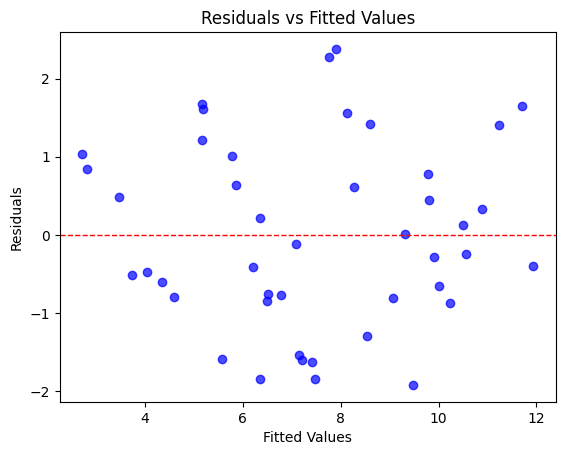

In [79]:
fitted_values = model4.fittedvalues
residuals = model4.resid

# Plot Residuals vs Fitted Values
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [85]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'model' is your fitted regression model from statsmodels
# For example:
# X = sm.add_constant(X)  # Add constant to X if necessary
# model = sm.OLS(y, X).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model4.resid, model4.model.exog)

# bp_test returns a tuple: (Lagrange Multiplier statistic, p-value, f-statistic, f-p-value)
print('Breusch-Pagan test p-value:', bp_test[1])


Breusch-Pagan test p-value: 0.12058298038659597


In [83]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 0.943342088544951


Text(0, 0.5, 'Frequency')

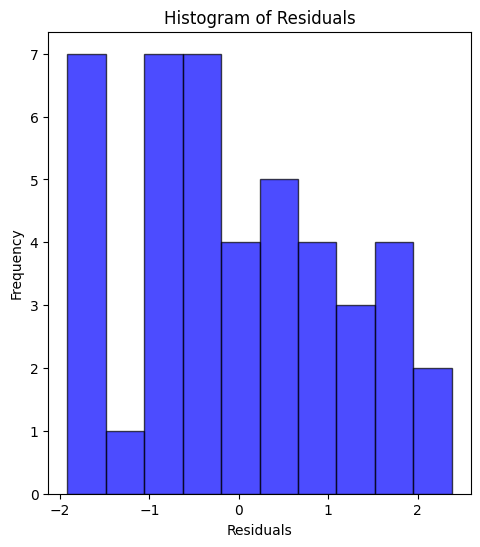

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


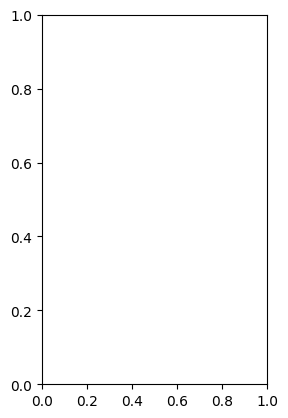

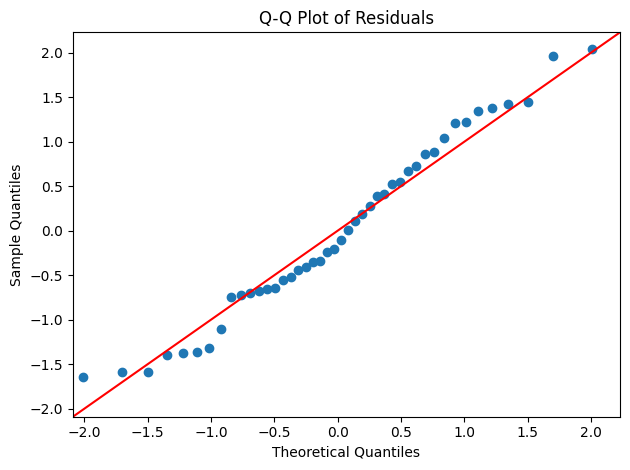

In [81]:
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

In [86]:
from scipy.stats import shapiro

# Assuming 'residuals' is an array of residuals from your regression model
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0).")
else:
    print("Residuals do not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9658316380011188, p-value: 0.21412622368761824
Residuals appear to be normally distributed (fail to reject H0).


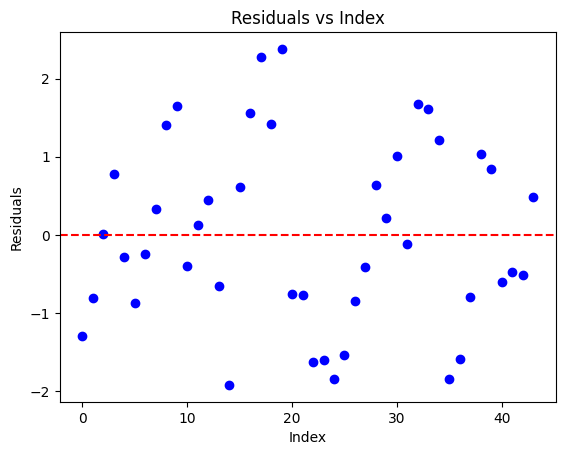

In [88]:
# Assuming 'residuals' is an array or list of residuals
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='none', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

In [89]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 0.943342088544951


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                      Variable           VIF
0                        const  15273.003810
1           AlcoholConsumption     15.935833
2                    HeatIndex      1.918986
3                    GDPgrowth      2.938346
4            HeatingDegre Days      1.099200
5                InternetUsers      9.344684
6  LaborForceParticipationRate     12.996035
7            PopulationDensity     49.525847
8      SchoolEnrollmentPrimary      8.761935
9             UnemploymentRate     15.356635


<Axes: xlabel='None', ylabel='AlcoholConsumption'>

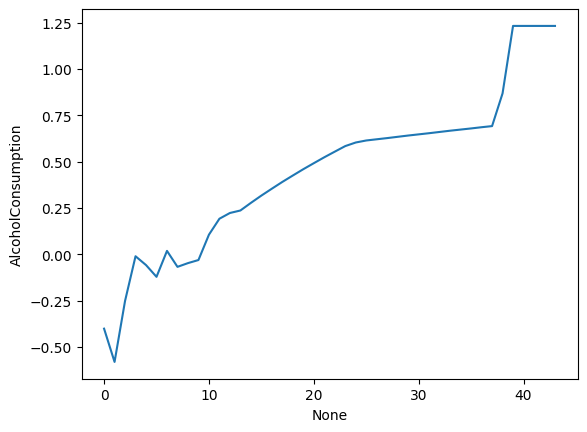

In [43]:
sns.lineplot(data=df2,x=df2.index,y=np.log(df2.AlcoholConsumption))

In [55]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Initialize ElasticNet model with chosen alpha and l1_ratio
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to the training data
elastic_net.fit(x_train_scaled, y_train)
y_pred = elastic_net.predict(x_test_scaled)

In [56]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.7989330426042178
Mean Squared Error: 1.8577646528346083
Root Mean Squared Error: 1.3629984052942279


In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]}

# Initialize GridSearchCV
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train the final model
elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
elastic_net.fit(x_train_scaled, y_train)

# Predict with the tuned model
y_pred = elastic_net.predict(x_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared (Tuned): {r2}")
print(f"Mean Squared Error (Tuned): {mse}")
print(f"Root Mean Squared Error (Tuned): {rmse}")


R-squared (Tuned): 0.7975711462946021
Mean Squared Error (Tuned): 1.8703479378138985
Root Mean Squared Error (Tuned): 1.3676066458649208


In [58]:
# Get the model coefficients
coefficients = elastic_net.coef_

# Display the coefficients with corresponding predictor names
feature_importance = pd.DataFrame({'Predictors': x.columns, 'Coefficient': coefficients})
print(feature_importance)

                    Predictors  Coefficient
0           AlcoholConsumption    -0.312618
1                    HeatIndex    -0.000000
2                    GDPgrowth    -0.000000
3            HeatingDegre Days     0.183829
4                InternetUsers    -0.754981
5  LaborForceParticipationRate     0.743138
6            PopulationDensity     0.097070
7      SchoolEnrollmentPrimary    -0.456569
8             UnemploymentRate     1.108954


In [65]:
import statsmodels.api as sm

# Add a constant to the predictors (intercept)
X_train_const = sm.add_constant(x_train_scaled)

# Fit an OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary which includes Adjusted R-squared
print(ols_model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.812
Model:                                  OLS   Adj. R-squared:                  0.744
Method:                       Least Squares   F-statistic:                     12.00
Date:                      Sun, 22 Dec 2024   Prob (F-statistic):           4.56e-07
Time:                              12:02:18   Log-Likelihood:                -53.764
No. Observations:                        35   AIC:                             127.5
Df Residuals:                            25   BIC:                             143.1
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import itertools


In [64]:
df2['prediction'] = ols_model.fittedvalues
df2['residuals'] = ols_model.resid

df2.head()

,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate,prediction,residuals
0,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69,8.598286,-1.343963
1,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69,9.035147,-0.772033
2,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69,9.130138,0.195002
3,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69,9.522387,1.040758
4,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69,NaN,NaN


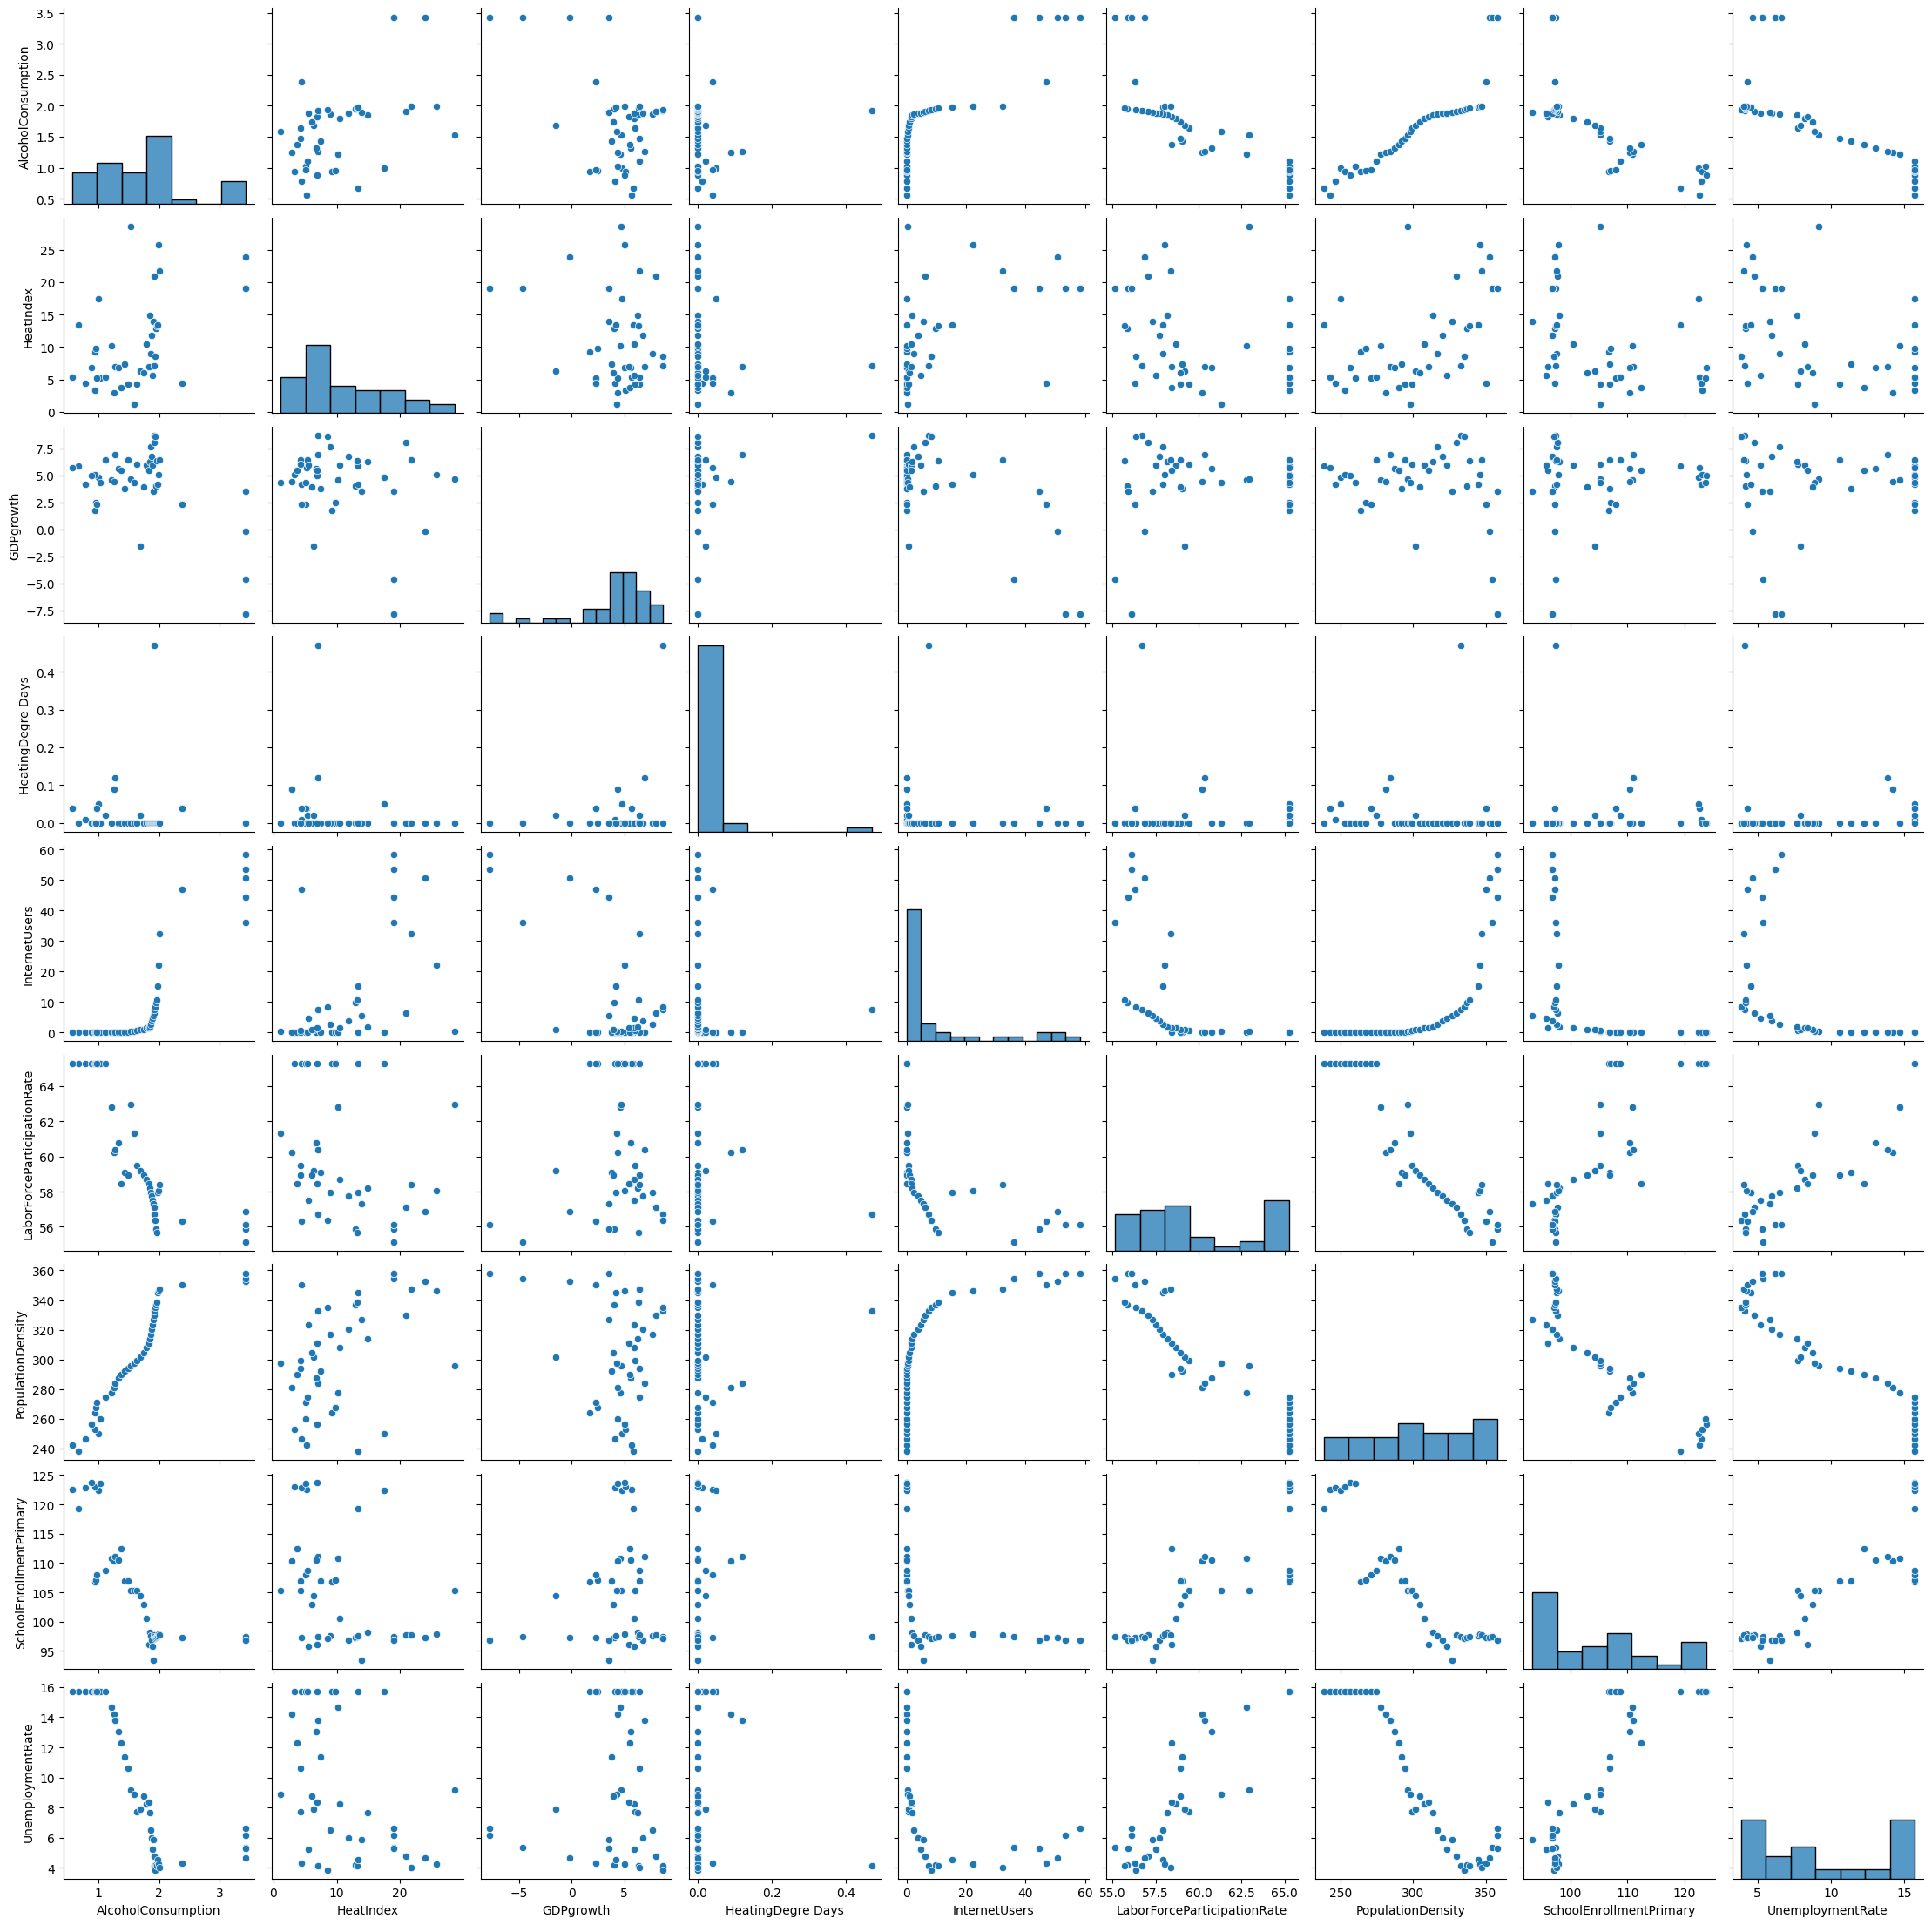

In [69]:
sns.pairplot(x)

In [ ]:
plot(x=df2.)